**Decoding Professional Journeys: A Data-Driven Exploration into Employee Dynamics at IBM**
<br />
<br />
*Unveiling Patterns and Predicting Attrition Using IBM HR Analytics Employee Attrition & Performance Dataset *



<img src="https://cdn.freebiesupply.com/images/large/2x/ibm-logo-white.png" alt="IBM Logo" width="400"/>



## 1.Introduction

The intricate link between employee attrition and performance is still a major area of concern for companies seeking to establish a positive work environment in the complex world of workforce dynamics. 

In this review, we examine the dataset "IBM HR Analytics Employee Attrition & Performance" of one of the tech giants, IBM, a world leader that continuously creates waves in the IT sector. As of 2023, IBM proudly holds the 4th rank among the top IT companies globally, a testament to its enduring impact on the digital landscape. <b>The dataset contains 1470 employees</b>

this project uses the CRISP-DM approach with Python as the programming language. we will try to predict the employee's Attrition and answer the following questions.
Key questions to be explored:
<ul>
<li style="padding:5px"><b>The Proximity Paradox:</b> Does the distance between an employee's home and workplace influence job satisfaction?</li>

<li style="padding:5px"><b>On the Road to Satisfaction:</b> Do frequent travelers experience lower job satisfaction?</li>

<li style="padding:5px"><b>Relationships Matter?:</b> Is there a discernible link between attrition rates and an individual's relationship satisfaction?</li>

</ul>

---

### Business Understanding

**Navigating Workforce Dynamics for Enhanced Organizational Prosperity**

Understanding the intricate dynamics of employee attrition and performance is paramount. As businesses strive for longevity and resilience, the role of workforce analytics becomes increasingly pivotal. 

**Objectives:**

Our primary business objective is to leverage IBM HR Analytics data to gain comprehensive insights into the factors influencing employee attrition and performance. By adopting a data-driven approach, we aim to uncover actionable patterns that can inform strategic decisions to enhance job satisfaction, minimize attrition rates, and optimize workforce performance.

**Expected Outcomes:**

Our exploration into the IBM HR Analytics dataset is poised to yield valuable insights that extend beyond numerical metrics. By deciphering the intricate narratives within the data, we anticipate the following outcomes:

1. **Informed Decision-Making:**

2. **Talent Optimization:**

3. **Cultural Enhancements:** 


---

# Data Understanding

the dataset that will be investegating is called <a href="https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data">"IBM HR Analytics Employee Attrition & Performance"</a>. it is a dataset from Kaggle.

the columns that we are mostly interested in are: 
* BusinessTravel: if the employees rarely, frequently or a non-traveler

* JobSatisfaction: the satisfaction of the employee ranked from : low, medium, high and very high

* RelationshipSatisfaction: the satisfaction of the employee's current relationship ranked from: low, medium, high and very high

* Gender: employee's current gender from Male and Female employees

* Education: employee's education, with the following possible responses:  Below College, College, Bachelor, Master and Doctor

* DistanceFromHome: employee's distance from home and work in miles.

Moreover, Logistic Regression will be used to predict attrition using these columns:
* Business Travel
* Age
* Distance From Home 
* Education
* Environment Satisfaction
* Gender 
* Hourly Rate
* Monthly Income
* Monthly Rate 
* Over Time
* Job Satisfaction
* Work Life Balance
* Years At Company 
* Years In Current Role
* Years Since Last Promotion
* Years With Curr Manager

---

# Data Preparation
data source can be found <a href="https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data">here</a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [29]:
# Importing the data 
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
print(f"There are {(df.isna().sum() > 0).sum()} nans in the dataset")

There are 0 nans in the dataset


luckily, there are no missing values 😄

In [31]:
# Getting an idea about what columns do we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Mappings Numerical Categorical to Text Categorical


this will help in the visualization part, then I will convert it back for the Machine Learning part

In [32]:
#Education
education_mapping = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
#EnvironmentSatisfaction
environment_satisfaction_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
#JobInvolvement
involvement_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
#JobSatisfaction
job_satisfaction_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
#PerformanceRating
performance_rating_mapping = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}
#RelationshipSatisfaction
relationship_satisfaction_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
#WorkLifeBalance
worklife_balance_mapping = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}
#Attrition Mapping
attrition_mapping = {
    "Yes":1,
    "No":0
}

In [33]:
df['Education'] = df['Education'].map(education_mapping)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(environment_satisfaction_mapping)
df['JobInvolvement'] = df['JobInvolvement'].map(involvement_mapping)
df['JobSatisfaction'] = df['JobSatisfaction'].map(job_satisfaction_mapping)
df['PerformanceRating'] = df['PerformanceRating'].map(performance_rating_mapping)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map(relationship_satisfaction_mapping)
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(worklife_balance_mapping)
df['Attrition'] = df['Attrition'].map(attrition_mapping)
df['Education'].value_counts()

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

## Question 1: Does the distance between an employee's home and workplace influence job satisfaction?

First, lets get a general idea of the distribution of the individuals for each class of the job satisfaction

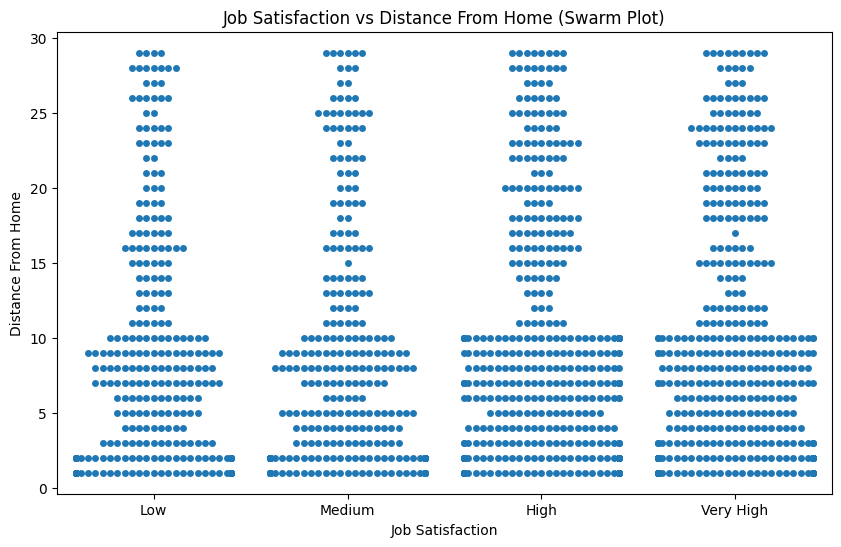

In [34]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='JobSatisfaction', y='DistanceFromHome', data=df, order=['Low', 'Medium', 'High', 'Very High'])
plt.title('Job Satisfaction vs Distance From Home (Swarm Plot)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Distance From Home')
plt.show()

As you can see from the figure above, the swarm plot indicates that:
1. The number of employees that lives far from work decreases 
2. It doesn't really indicates a trend from employees who lives far from work to the job satisfaction
3. in each distance range, the Very High and High categories seems to be more that the Medium and Low categories

Well, its too early to tell, lets dig deep and see percentages for each ranges incrementing by 5 miles

<Figure size 800x800 with 0 Axes>

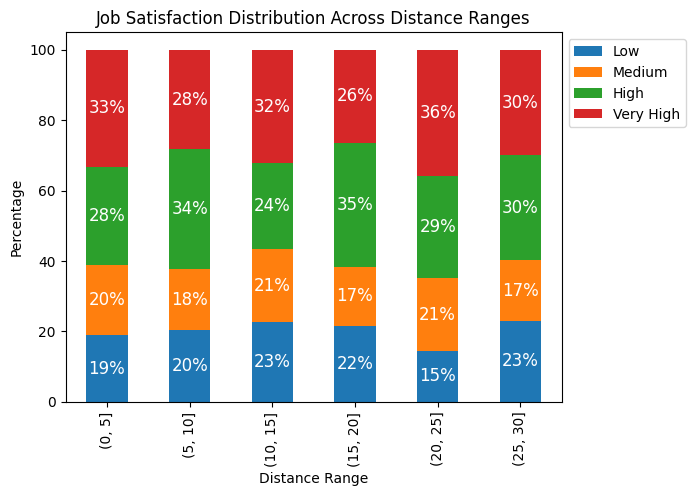

In [35]:
bins = [0, 5, 10, 15, 20, 25, 30]  # Adjust these ranges based on your data
df_q1 = df.copy()
# Create a new column for distance ranges
df_q1['DistanceRange'] = pd.cut(df_q1['DistanceFromHome'], bins=bins)

# Order the JobSatisfaction column
job_satisfaction_order = ['Low', 'Medium', 'High', 'Very High']
df_q1['JobSatisfaction'] = pd.Categorical(df_q1['JobSatisfaction'], categories=job_satisfaction_order, ordered=True)

# Create a cross-tabulation for percentage calculation
cross_tab = pd.crosstab(df_q1['DistanceRange'], df_q1['JobSatisfaction'], normalize='index') * 100

# Plot the stacked bar plot
plt.figure(figsize=(8, 8))
ax = cross_tab.plot(kind='bar', stacked=True)
plt.title('Job Satisfaction Distribution Across Distance Ranges')
plt.xlabel('Distance Range')
plt.ylabel('Percentage')

# Add percentages to each region
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(height), 
            color='white',
            fontsize=12,  # Adjust as needed
            horizontalalignment='center', 
            verticalalignment='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

We can clearly see that:
* for the Very High and High Category, it doesn't really affect them if the distance increase or decrease
* for the Medium and Low Category, they seem to have a consistent Job satisfaction percentage, doesn't indicate that a more distant home from work makes them unsatisfaied

<strong>Conclusion: Distance has no relationship with Job Satisfaction, why? well, the Very High and High always are greater than the Medium and Low even when the distance increase! which makes me happy. Why? because its difficult to fix this, you can't tell people to move closer to the company but you can make them work from home right?</strong>

---

## Question 2: Do frequent travelers experience lower job satisfaction?

In [36]:
# Change the labels
df_travel = df.copy()
df_travel['TravelFrequency'] = df_travel['BusinessTravel'].map({
    'Travel_Rarely': 'Rarely',
    'Travel_Frequently': 'Frequently',
    'Non-Travel': 'Non-Travel'
})

In [37]:
# Lets see what we are dealing with
df_travel['TravelFrequency'].value_counts()

Rarely        1043
Frequently     277
Non-Travel     150
Name: TravelFrequency, dtype: int64

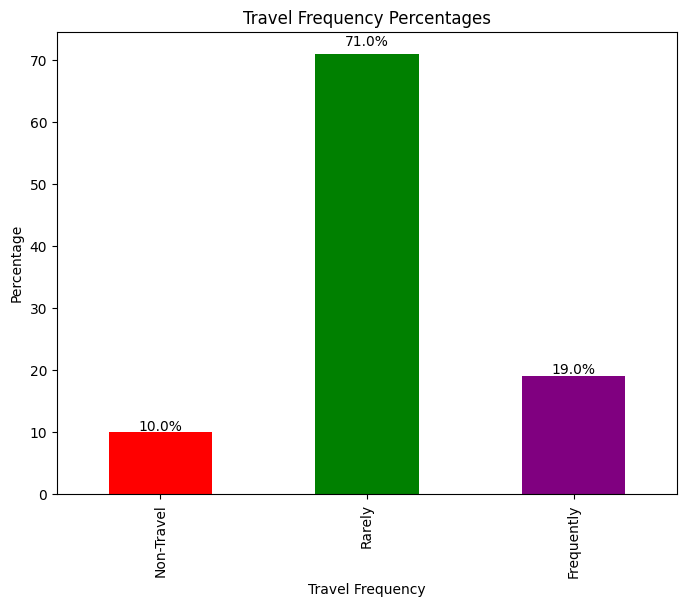

In [38]:
# Calculate the percentages
percentages = df_travel['TravelFrequency'].value_counts(normalize=True).round(2) * 100

# Reorder the index
percentages = percentages.reindex(['Non-Travel', 'Rarely', 'Frequently'])

# Create the bar plot with different colors for each bar
ax = percentages.plot(kind='bar', figsize=(8, 6), color=['red', 'green', 'purple'])

# Add the percentages to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

plt.title('Travel Frequency Percentages')
plt.xlabel('Travel Frequency')
plt.ylabel('Percentage')
plt.show()

Wooah, a majority of employees <span style="color:green;">rarely</span> Travel with <b style="color:green;">71%</b> and <b style="color:red;">10%</b> for <span style="color:red;">non-travel</span> and <b style="color:purple;">19%</b> for <span style="color:purple;">frequently</span>.

This can be challenging to determine, since 71% is a large proportion.

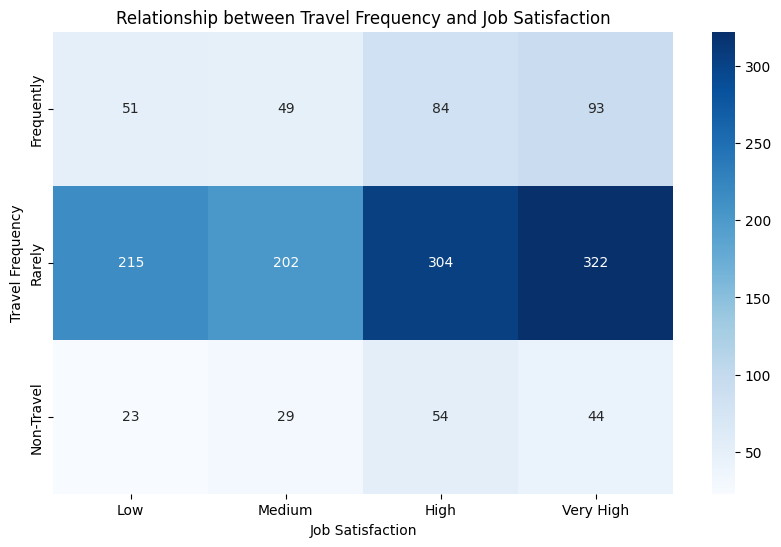

In [116]:
# Create a cross-tabulation (contingency table) of the data
cross_tab = pd.crosstab(df_travel['TravelFrequency'], df_travel['JobSatisfaction'])

# Reorder the rows of the cross-tabulation
cross_tab = cross_tab.reindex(['Frequently', 'Rarely', 'Non-Travel'])

# Reorder the columns of the cross-tabulation
cross_tab = cross_tab[['Low', 'Medium', 'High', 'Very High']]

# Plotting a heatmap using seaborn with specified y-axis order
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Relationship between Travel Frequency and Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Travel Frequency')
plt.show()

Result interpretation is the following:

| Travel Frequency | Low Job Satisfaction | Medium Job Satisfaction | High Job Satisfaction | Very High Job Satisfaction | Total |
|-------------------|----------------------|--------------------------|-----------------------|-----------------------------|-------|
| Frequently        | 51                   | 49                       | 84                    | 93                          | 277   |
| Rarely            | 215                  | 202                      | 304                   | 322                         | 1043  |
| Non-Travel        | 23                   | 29                       | 54                    | 44                          | 150   |
| **Total**         | **289**              | **280**                  | **442**               | **459**                     | **1470**|

Well, it seems that travel frequency does have a slight correlation with job satisfaction, why you might ask? because even though the proportion of rarely travelers is significant compared to frequent and non travelers, we can still see that when you go right (i.e increasing the job satisfaction level) and compare it to the travel frequency, it will look like the number of employees is increasing. Moreover, As much as you go right for each row, the heatmap seems to get darker and darker.

I have an idea, why don't we try a <span title="A statistical test that is used to determine whether there is a significant association between two categorical variables.">Chi-Square (Hover to read the tooltip)</span> test to see correlation between categorical values?

In [40]:
# Null Hypothesis: Travel Frequency Has no correlation with Job Satisfaction
# with common significance level of 0.05
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(cross_tab)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")


Chi-square statistic: 5.219803510653503
P-value: 0.5159466426413337
Degrees of freedom: 6


Well, with a p-value of <b>0.51</b> which is higher than 0.05, we cannot reject the Null Hypothesis therefore Travel Frequency has no correlation with Job Satisfaction
<br><br>
<b>Conclusion: Travel Frequency has no correlation with Job Satisfaction</b>

---

## Question 3: Is there a discernible link between attrition and an individual's martial status?

In [41]:
df_q3 = df.copy()

In [42]:
# Assuming df_q3 is your DataFrame, and 'MaritalStatus' is the column of interest
marital_status_counts = df_q3['MaritalStatus'].value_counts()

# Print the summary statement
print(f"We can see that {marital_status_counts['Married']} are married, {marital_status_counts['Single']} are single, and {marital_status_counts['Divorced']} are divorced.")

We can see that 673 are married, 470 are single, and 327 are divorced.


lets plot the percentage

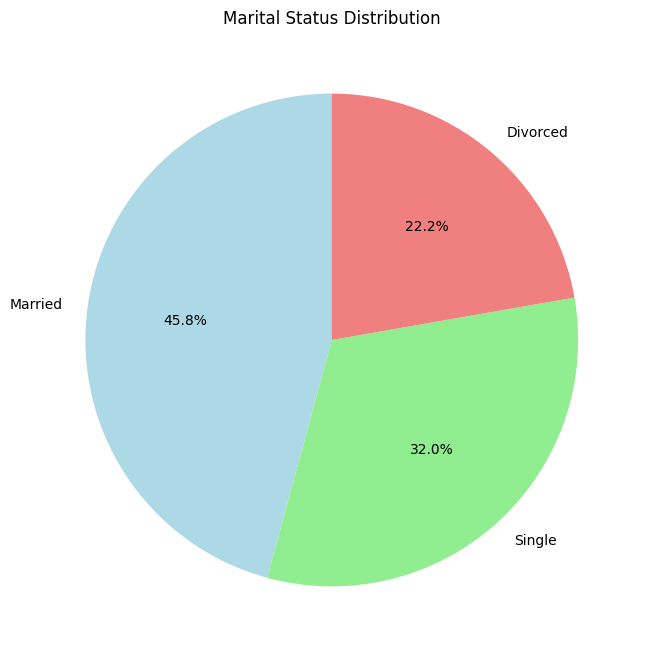

In [43]:
# Assuming df_q3 is your DataFrame, and 'MaritalStatus' is the column of interest
marital_status_counts = df_q3['MaritalStatus'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Marital Status Distribution')
plt.show()

As you can see from the figure above, the married percentage is larger than the singles and divorced individuals which is great I suppose.

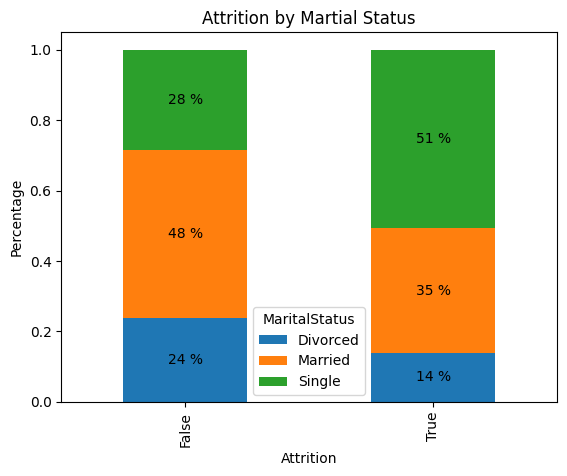

In [44]:
# Create a crosstab and normalize over each row to get the proportion
ct = pd.crosstab(df_q3['Attrition'], df_q3['MaritalStatus'], normalize='index')

# Plot
ax = ct.plot(kind='bar', stacked=True)
plt.ylabel('Percentage')
plt.title('Attrition by Martial Status')

# Adding the percentage values on each section of the bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')
    
# Rename x-axis labels
ax.set_xticklabels(['False', 'True'])

plt.show()

As you can see from the figure above, people who suffers attrition are mostly employees who are single with a large percentage of <b>51%</b> then followed by married employees with <b>35%</b>.
<br><br>
Moreover, based on the plot above, there could be a relationship between MaritalStatus and Attrition. I am going to use the famous <span title="A statistical test that is used to determine whether there is a significant association between two categorical variables.">Chi-Square (Hover to read the tooltip)</span> to test this.

In [45]:
# NULL HYPOTHESIS: Marital status has no effect on attrition
# with common significance level of 0.05
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df_q3 is your DataFrame

# Create a crosstab
ct = pd.crosstab(df_q3['Attrition'], df_q3['MaritalStatus'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")


Chi-square statistic: 46.163676540848705
P-value: 9.455511060340833e-11
Degrees of freedom: 2


Since our p-value is much much smaller than the common significance level of 0.05.
<br><br>
0.05 > p-value ($9.4 \times 10^{-11}$)
<br><br>
Well well well, it appears that we will reject the null hypothesis (i.e marital status has no effect on attrition) based on the Chi-Squared test. And marital status does have a correlation with attrition

## Can we predict the attrition of employees?

For this task, we will consider using Logistic Regression 😁

In [85]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'IncomeGroup'],
      dtype='object')

In [76]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

The standard deviation is really high, with a ±4707 $, this change in monthly income could be a problem when training our model, I will do the following:
* Split salaries into four groups: Low, Medium High  and Very High
* Based on Bard's response (Bard is an LLM developed by Google) I will do this split:
    * Very Low ε [0,999]
    * Low ε [1000,4999]
    * Medium ε [5000,9999]
    * High ε [10000,14999]
    * Very High ε [15000,19999]


In [104]:
# Define the bins
bins = [0, 1000, 5000, 10000, 15000, np.inf]
# Define the group names
names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'IncomeGroup'
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins, labels=names)


In [101]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [102]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

I will drop 
* EmployeeCount: doesnt really indicate anything, it contains the number one 1470 times 
* EmployeeNumber: Employee's number, it is not really helpful to have it
* StandardHours: for each observation of the 1470 employees, they all have 80 standard hours, which doesn't really mean anything and might affect the model
* Over18: same problem as StandardHours, it has the value Y for 1470 observation


In [105]:
X = df.drop(columns=['Attrition','EmployeeCount','EmployeeNumber','StandardHours','Over18','MonthlyIncome'])
y = df['Attrition']

#### Handling Categorical Values 

In [106]:
categorical_cols = ['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'Gender', 'OverTime', 'JobSatisfaction', 'WorkLifeBalance','IncomeGroup']
X = pd.get_dummies(X)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 250, 500, 1000],  # Add max_iter as it can affect convergence
    'class_weight': [None, 'balanced']  # Consider class weights for imbalanced datasets
}

# Create a Logistic Regression model
lr = LogisticRegression()

# Create the grid search model
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the test set using the model with the best parameters
y_pred = grid_search.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 1120 candidates, totalling 5600 fits
Best parameters: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       255
           1       0.50      0.44      0.47        39

    accuracy                           0.87       294
   macro avg       0.71      0.68      0.70       294
weighted avg       0.86      0.87      0.86       294

